In [4]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Import necessary libraries
import pandas as pd
from scipy.stats import pearsonr
from tabulate import tabulate
import numpy as np

In [33]:
import pandas as pd
from scipy.stats import pearsonr

In [34]:
# Set file path and sheet name
file_path = 'SN_IMPLANTS_nice.xlsx'  # Path to the Excel file
sheet_name = 'IMPLANTS UNIQUE V2'  # Sheet name containing the data

# Load the specified sheet from the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name, header=1)

# Ensure 'Year' column is of integer type
df['Year'] = df['Year'].astype(int)

# Display the first few rows of the DataFrame to verify successful loading
df.head()

,Country,Year,Old_Model,Old_Model_Units,Manufacturer,Model_new,New_Model_Units,Old_Model_MS,Manufacturer_Market_Share,New_Model_MS,SN_Manufacturer_Local,SN_Model_Local,SN_Manufacturer_Global,SN_Model_Global,SN_Manufacturer_Local_A02,SN_Model_Local_A02,SN_Manufacturer_Global_A02,SN_Model_Global_A02,SN_Manufacturer_Local_A23,SN_Model_Local_A23,SN_Manufacturer_Global_A23,SN_Model_Global_A23,Delta_MS_change_Model,SN_Model_Local_prev_year,SN_Model_Global_prev_year,SN_Model_Global_2prev_year,SN_Manufacturer_Local_A232,SN_Model_Local_A233,SN_Manufacturer_Global_A234,SN_Model_Global_A235
0,AUS,2004,Active Knee,827.0,ALLEGRA,ACTIVE,827.0,0.040691,0.040691,0.040691,0,0,0,0,0,0,0,0,0,0,0,0,0.040691,0,0,0,0.0,0.0,0.0,0.0
1,AUS,2005,Active Knee,763.0,ALLEGRA,ACTIVE,763.0,0.033670,0.033670,0.033670,0,0,0,0,0,0,0,0,0,0,0,0,-0.007021,0,0,0,NaN,NaN,NaN,NaN
2,AUS,2002,AGC,633.0,ZIMMER_BIOMET,AGC,633.0,0.037710,0.257238,0.037710,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,NaN,NaN,NaN,NaN
3,AUS,2018,Apex Knee CR,1400.0,OMNILIFE_SCIENCE,APEX_KNEE_CR,1400.0,0.038061,0.038061,0.038061,0,0,0,0,0,0,0,0,0,0,0,0,0.038061,0,0,0,NaN,NaN,NaN,NaN
4,AUS,2019,Apex Knee CR,1477.0,OMNILIFE_SCIENCE,APEX_KNEE_CR,1477.0,0.039536,0.039536,0.039536,0,0,0,0,0,0,0,0,0,0,0,0,0.001475,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
######CORRELATION Market Share(year X)  VS Safety Notices(year X-1)

In [19]:
# Group the DataFrame by 'Model_new'
grouped = df.groupby('Model_new')

# Initialize an empty dictionary to store correlation results and p-values for each model (previous year)
results_prev_year = {}

# Loop through each group (model) and calculate the Pearson correlation coefficient and p-value for the previous year
for model, group in grouped:
    # Drop rows with NaN values in the columns of interest
    clean_group = group[['Delta_MS_change_Model', 'SN_Model_Global_prev_year']].dropna()

    if clean_group.shape[0] > 1:  # Ensure there are at least 2 valid rows
        # Calculate Pearson correlation coefficient and p-value
        correlation, p_value = pearsonr(clean_group['Delta_MS_change_Model'], clean_group['SN_Model_Global_prev_year'])
        if not pd.isna(correlation):  # Only store results if valid correlation is calculated
            results_prev_year[model] = {'Correlation': correlation, 'P-Value': p_value}

# Convert the results dictionary to a DataFrame for easier viewing and manipulation
results_df_prev_year = pd.DataFrame.from_dict(results_prev_year, orient='index')

# Remove models with 'None' values to clean up the DataFrame before printing
results_df_prev_year.dropna(inplace=True)

# Display the results in a tabular format
print(tabulate(results_df_prev_year, headers='keys', tablefmt='grid'))


+--------------+---------------+-----------+
|              |   Correlation |   P-Value |
+==============+===============+===========+
| ACTIVE       |   -0          | 1         |
+--------------+---------------+-----------+
| ADVANCE      |   -0.511673   | 0.0357716 |
+--------------+---------------+-----------+
| AGC          |    0.18078    | 0.306235  |
+--------------+---------------+-----------+
| ATTUNE       |    0.0229856  | 0.874108  |
+--------------+---------------+-----------+
| BALANSYS     |   -0.0437375  | 0.815277  |
+--------------+---------------+-----------+
| DURACON      |   -0.0468917  | 0.765251  |
+--------------+---------------+-----------+
| ENDURO       |   -0          | 1         |
+--------------+---------------+-----------+
| EVOLUTION    |    0.829214   | 0.010913  |
+--------------+---------------+-----------+
| GENESIS_II   |    0.00735029 | 0.945183  |
+--------------+---------------+-----------+
| GMK          |    0.228973   | 0.331525  |
+---------

In [ ]:
######CORRELATION Market Share(year X)  VS Safety Notices(year X-2)

In [20]:
# Initialize an empty dictionary to store correlation results and p-values for each model (two years ago)
results_two_prev_years = {}

# Loop through each group (model) and calculate the Pearson correlation coefficient and p-value for two years ago
for model, group in grouped:
    # Drop rows with NaN values in the columns of interest
    clean_group = group[['Delta_MS_change_Model', 'SN_Model_Global_2prev_year']].dropna()

    if clean_group.shape[0] > 1:  # Ensure there are at least 2 valid rows
        # Calculate Pearson correlation coefficient and p-value
        correlation, p_value = pearsonr(clean_group['Delta_MS_change_Model'], clean_group['SN_Model_Global_2prev_year'])
        if not pd.isna(correlation):  # Only store results if valid correlation is calculated
            results_two_prev_years[model] = {'Correlation': correlation, 'P-Value': p_value}

# Convert the results dictionary to a DataFrame for easier viewing and manipulation
results_df_two_prev_years = pd.DataFrame.from_dict(results_two_prev_years, orient='index')

# Remove models with 'None' values to clean up the DataFrame before printing
results_df_two_prev_years.dropna(inplace=True)

# Display the results in a tabular format
print(tabulate(results_df_two_prev_years, headers='keys', tablefmt='grid'))


+--------------+---------------+-----------+
|              |   Correlation |   P-Value |
+==============+===============+===========+
| ACTIVE       |   -0          |  1        |
+--------------+---------------+-----------+
| ADVANCE      |   -0.40771    |  0.104272 |
+--------------+---------------+-----------+
| AGC          |    0.18078    |  0.306235 |
+--------------+---------------+-----------+
| ATTUNE       |   -0.0224545  |  0.876994 |
+--------------+---------------+-----------+
| BALANSYS     |   -0.230224   |  0.212772 |
+--------------+---------------+-----------+
| DURACON      |    0.0598993  |  0.702792 |
+--------------+---------------+-----------+
| ENDURO       |   -0          |  1        |
+--------------+---------------+-----------+
| EVOLUTION    |   -0.0244965  |  0.954087 |
+--------------+---------------+-----------+
| GENESIS_II   |   -0.159878   |  0.132263 |
+--------------+---------------+-----------+
| GMK          |   -0.23476    |  0.319109 |
+---------

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
##MODEL Market Share: RANDOM FOREST REGRESSION using Safety notices in year x-1 and x-2 as part of the input

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Feature lists
categorical_features = ['Country', 'Manufacturer', 'Model_new']  # Categorical variables for one-hot encoding
numeric_features = ['Manufacturer_Market_Share', 'New_Model_MS', 'SN_Model_Local_prev_year', 
                    'SN_Model_Global_prev_year', 'SN_Model_Global_2prev_year']  # Numeric predictors

# Update the ColumnTransformer to ignore unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Define the model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Defining X and y
X = df[categorical_features + numeric_features]  # Ensure this combination only includes correct column names
y = df['Delta_MS_change_Model']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results in a tabular format
evaluation_results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R² Score'],
    'Value': [mse, r2]
})

print(tabulate(evaluation_results, headers='keys', tablefmt='grid'))


+----+--------------------+--------------+
|    | Metric             |        Value |
+====+====================+==============+
|  0 | Mean Squared Error |  0.000844578 |
+----+--------------------+--------------+
|  1 | R² Score           | -0.125915    |
+----+--------------------+--------------+


In [ ]:
##MODEL MS: NEURAL NETWORK using Safety notices in year x-1 and x-2 as part of the input

In [65]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from tabulate import tabulate


In [62]:
# Define numeric and categorical features
numeric_features = ['Manufacturer_Market_Share', 'New_Model_MS', 'SN_Model_Local_prev_year', 'SN_Model_Global_prev_year', 'SN_Model_Global_2prev_year']
categorical_features = ['Country', 'Manufacturer', 'Model_new']

# Preprocessor for handling categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)


In [63]:
# Neural network architecture
def create_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [64]:
# Prepare data
X = df[categorical_features + numeric_features]
y = df['Delta_MS_change_Model']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor to compute the input dimension
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
input_dim = X_train_transformed.shape[1]


In [66]:
# Define the model pipeline with dynamically sized input
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KerasRegressor(model=create_model, model__input_dim=input_dim, epochs=100, batch_size=10, verbose=1))
])

# Train the model
pipeline.fit(X_train, y_train)


Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036 - mae: 0.0403
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3354e-04 - mae: 0.0181  
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5177e-04 - mae: 0.0153
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3704e-04 - mae: 0.0159
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6264e-04 - mae: 0.0138
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6455e-04 - mae: 0.0127
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1522e-04 - mae: 0.0140
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 4.1964e-04 - mae: 0.0131
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0123e-04 - mae: 0.0131  
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4071e-04 - mae: 0.0114
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1558e-04 - mae: 0.0129
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3131e-04 -

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Manufacturer_Market_Share',
                                                   'New_Model_MS',
                                                   'SN_Model_Local_prev_year',
                                                   'SN_Model_Global_prev_year',
                                                   'SN_Model_Global_2prev_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Manufacturer',
                                                   'Model_new'])])),
                ('regressor',
                 KerasRegressor(batch_size=10, epochs=100, model=<function create_model at 0x7f2648015120>, model__input_dim=101))])

In [67]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results in a tabular format
evaluation_results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R² Score'],
    'Value': [mse, r2]
})

print(tabulate(evaluation_results, headers='keys', tablefmt='grid'))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
+----+--------------------+--------------+
|    | Metric             |        Value |
+====+====================+==============+
|  0 | Mean Squared Error |  0.000854487 |
+----+--------------------+--------------+
|  1 | R² Score           | -0.139126    |
+----+--------------------+--------------+


In [ ]:
##MODEL MS: XG BOOST using Safety notices in year x-1 and x-2 as part of the input

In [73]:

# Feature Engineering
# Adding log-transformed and interaction features
df['Log_Manufacturer_MS'] = np.log1p(df['Manufacturer_Market_Share'])
df['Interaction_MS_SN_Global'] = df['New_Model_MS'] * df['SN_Model_Global_prev_year']

# Define numeric and categorical features, including new features
numeric_features = ['Manufacturer_Market_Share', 'New_Model_MS', 
                    'SN_Model_Local_prev_year', 'SN_Model_Global_prev_year', 
                    'SN_Model_Global_2prev_year', 'Log_Manufacturer_MS', 
                    'Interaction_MS_SN_Global']
categorical_features = ['Country', 'Manufacturer', 'Model_new']

# Preprocessor for handling categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Define the model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])

# Prepare data
X = df[categorical_features + numeric_features]
y = df['Delta_MS_change_Model']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results in a tabular format
evaluation_results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R² Score'],
    'Value': [mse, r2]
})

print(tabulate(evaluation_results, headers='keys', tablefmt='grid'))

+----+--------------------+-------------+
|    | Metric             |       Value |
+====+====================+=============+
|  0 | Mean Squared Error |  0.00117979 |
+----+--------------------+-------------+
|  1 | R² Score           | -0.572787   |
+----+--------------------+-------------+


In [ ]:
#####FROM HERE, WE MOVE INTO THE ANALYSIS THAT FACTOR IN IMDRF codes

In [ ]:
######CORRELATION Market Share(year X)  VS Safety Notices(year X-1)

In [78]:
import pandas as pd
from scipy.stats import pearsonr
from tabulate import tabulate

# Load the DataFrame from the Excel file
file_path = 'SN_IMPLANTS_nice.xlsx'  # Adjust the file path as needed
sheet_name = 'IMPLANTS'  # Sheet name containing the data with SNs per iMDRF code
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure correct data types, especially for year
df['Year'] = df['Year'].astype(int)

# Filter the DataFrame to only include unique combinations of Country, Year, and Model_new
df = df.drop_duplicates(subset=['Country', 'Year', 'Model_new'])

# Define the specific safety notice columns
sn_columns = [
    'SN_Model_Global_A01_prev_year', 'SN_Model_Global_A02_prev_year',
    'SN_Model_Global_A04_prev_year', 'SN_Model_Global_A05_prev_year',
    'SN_Model_Global_A09_prev_year', 'SN_Model_Global_A17_prev_year',
    'SN_Model_Global_A18_prev_year', 'SN_Model_Global_A20_prev_year',
    'SN_Model_Global_A21_prev_year', 'SN_Model_Global_23_prev_year',
    'SN_Model_Global_A24_prev_year', 'SN_Model_Global_A26_prev_year'
]

# Initialize an empty dictionary to store correlation results and p-values for each SN type
results = {}

# Loop through each SN type to calculate correlations across all models
for sn_column in sn_columns:
    # Aggregate the data for the specific SN type across all models
    aggregate_data = df[['Delta_MS_change_Model', sn_column]].dropna()

    if aggregate_data.shape[0] > 1:  # Ensure there's enough data to calculate a correlation
        # Calculate the Pearson correlation coefficient and the p-value
        correlation, p_value = pearsonr(aggregate_data['Delta_MS_change_Model'], aggregate_data[sn_column])
        # Store results if a valid correlation and p-value were calculated
        if not pd.isna(correlation):
            results[sn_column] = {'Correlation': correlation, 'P-Value': p_value}

# Convert the results dictionary to a DataFrame for easier viewing/manipulation
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['Safety Notice Type', 'Correlation', 'P-Value']

# Display results using tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid'))


+----+-------------------------------+---------------+------------+
|    | Safety Notice Type            |   Correlation |    P-Value |
+====+===============================+===============+============+
|  0 | SN_Model_Global_A01_prev_year |  -0.000575983 | 0.984528   |
+----+-------------------------------+---------------+------------+
|  1 | SN_Model_Global_A02_prev_year |   0.0181646   | 0.540797   |
+----+-------------------------------+---------------+------------+
|  2 | SN_Model_Global_A04_prev_year |   0.0491711   | 0.0976268  |
+----+-------------------------------+---------------+------------+
|  3 | SN_Model_Global_A05_prev_year |   0.0514869   | 0.0828142  |
+----+-------------------------------+---------------+------------+
|  4 | SN_Model_Global_A17_prev_year |  -0.0269355   | 0.364399   |
+----+-------------------------------+---------------+------------+
|  5 | SN_Model_Global_A18_prev_year |  -0.00299943  | 0.919564   |
+----+-------------------------------+----------

In [79]:
import pandas as pd
from scipy.stats import pearsonr
from tabulate import tabulate

# Load the DataFrame from the Excel file
file_path = 'SN_IMPLANTS_nice.xlsx'  # Adjust the file path as needed
sheet_name = 'IMPLANTS'  # Sheet name containing the data with SNs per iMDRF code
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure correct data types, especially for year
df['Year'] = df['Year'].astype(int)

# Filter the DataFrame to only include unique combinations of Country, Year, and Model_new
df = df.drop_duplicates(subset=['Country', 'Year', 'Model_new'])

# Define the specific safety notice columns
sn_columns = [
    'SN_Model_Global_A01_prev_year2', 'SN_Model_Global_A02_prev_year2',
    'SN_Model_Global_A04_prev_year2', 'SN_Model_Global_A05_prev_year2',
    'SN_Model_Global_A09_prev_year2', 'SN_Model_Global_A17_prev_year2',
    'SN_Model_Global_A18_prev_year2', 'SN_Model_Global_A20_prev_year2',
    'SN_Model_Global_A21_prev_year2', 'SN_Model_Global_23_prev_year2',
    'SN_Model_Global_A24_prev_year2', 'SN_Model_Global_A26_prev_year2'
]


# Initialize an empty dictionary to store correlation results and p-values for each SN type
results = {}

# Loop through each SN type to calculate correlations across all models
for sn_column in sn_columns:
    # Aggregate the data for the specific SN type across all models
    aggregate_data = df[['Delta_MS_change_Model', sn_column]].dropna()

    if aggregate_data.shape[0] > 1:  # Ensure there's enough data to calculate a correlation
        # Calculate the Pearson correlation coefficient and the p-value
        correlation, p_value = pearsonr(aggregate_data['Delta_MS_change_Model'], aggregate_data[sn_column])
        # Store results if a valid correlation and p-value were calculated
        if not pd.isna(correlation):
            results[sn_column] = {'Correlation': correlation, 'P-Value': p_value}

# Convert the results dictionary to a DataFrame for easier viewing/manipulation
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['Safety Notice Type', 'Correlation', 'P-Value']

# Display results using tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid'))


+----+--------------------------------+---------------+-----------+
|    | Safety Notice Type             |   Correlation |   P-Value |
+====+================================+===============+===========+
|  0 | SN_Model_Global_A01_prev_year2 |   -0.00476572 |  0.872526 |
+----+--------------------------------+---------------+-----------+
|  1 | SN_Model_Global_A02_prev_year2 |   -0.0217755  |  0.463429 |
+----+--------------------------------+---------------+-----------+
|  2 | SN_Model_Global_A04_prev_year2 |    0.0408656  |  0.168692 |
+----+--------------------------------+---------------+-----------+
|  3 | SN_Model_Global_A05_prev_year2 |    0.0188574  |  0.52547  |
+----+--------------------------------+---------------+-----------+
|  4 | SN_Model_Global_A17_prev_year2 |   -0.0140713  |  0.635665 |
+----+--------------------------------+---------------+-----------+
|  5 | SN_Model_Global_A18_prev_year2 |    0.0153304  |  0.605737 |
+----+--------------------------------+---------

In [ ]:
##MODEL MS: Random Forest model using Safety notices in year x-1 and x-2 as part of the input by IMDRF code

In [85]:
# Load your data from an Excel file
file_path = 'SN_IMPLANTS_nice.xlsx'
df = pd.read_excel(file_path, sheet_name='IMPLANTS')

# Select features and target for the model
features = [
    'Year', 'Model_new', 'New_Model_MS',
    'SN_Manufacturer_Local_A02_prev_year', 'SN_Model_Local_A02_prev_year',
    'SN_Manufacturer_Global_A02_prev_year', 'SN_Model_Global_A02_prev_year',
    'SN_Manufacturer_Local_A23_prev_year', 'SN_Model_Local_A23_prev_year',
    'SN_Manufacturer_Global_A23_prev_year', 'SN_Model_Global_A23_prev_year',
    'SN_Manufacturer_Local_A21_prev_year', 'SN_Model_Local_A21_prev_year',
    'SN_Manufacturer_Global_A21_prev_year', 'SN_Model_Global_A21_prev_year'
]
target = 'Delta_MS_change_Model'

# Identify categorical and numerical features
categorical_features = ['Model_new']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessor for handling numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),  # One-hot encode categorical features
    ]
)

# Create a pipeline that includes preprocessing and the RandomForest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Apply RandomForest Regressor
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R² Score

# Get the feature importances from the RandomForest Regressor
feature_importances = model.named_steps['regressor'].feature_importances_

# Get the feature names after one-hot encoding
encoded_features = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_features)

# Create a Series to view the feature importances
importance_ranking = pd.Series(feature_importances, index=all_features).sort_values(ascending=False)

# Display evaluation results in a tabular format
evaluation_results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R² Score'],
    'Value': [mse, r2]
})
print(tabulate(evaluation_results, headers='keys', tablefmt='grid'))

# Display feature importances in a tabular format
importance_ranking_df = importance_ranking.reset_index()
importance_ranking_df.columns = ['Feature', 'Importance']
#print(tabulate(importance_ranking_df, headers='keys', tablefmt='grid'))


+----+--------------------+-------------+
|    | Metric             |       Value |
+====+====================+=============+
|  0 | Mean Squared Error | 0.000211632 |
+----+--------------------+-------------+
|  1 | R² Score           | 0.750582    |
+----+--------------------+-------------+


In [ ]:
##MODEL MS: XG BOOST using Safety notices in year x-1 and x-2 as part of the input

In [88]:
# Load your data
file_path = 'SN_IMPLANTS_nice.xlsx'
df = pd.read_excel(file_path, sheet_name='IMPLANTS')

# Define the features and target
features = [
    'Country', 'Year', 'Manufacturer', 'Model_new', 'Manufacturer_Market_Share', 'New_Model_MS',
    'SN_Manufacturer_Local_A02_prev_year', 'SN_Model_Local_A02_prev_year',
    'SN_Manufacturer_Global_A02_prev_year', 'SN_Model_Global_A02_prev_year',
    'SN_Manufacturer_Local_A23_prev_year', 'SN_Model_Local_A23_prev_year',
    'SN_Manufacturer_Global_A23_prev_year', 'SN_Model_Global_A23_prev_year',
    'SN_Manufacturer_Local_A21_prev_year', 'SN_Model_Local_A21_prev_year',
    'SN_Manufacturer_Global_A21_prev_year', 'SN_Model_Global_A21_prev_year'
]
target = 'Delta_MS_change_Model'

# Handling categorical and numerical variables
categorical_features = ['Country', 'Manufacturer', 'Model_new']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessor for handling numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),  # One-hot encode categorical features
    ]
)

# Prepare data
X = df[features]
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize XGBoost regressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R² Score

# Display evaluation results in a tabular format
evaluation_results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R² Score'],
    'Value': [mse, r2]
})
print(tabulate(evaluation_results, headers='keys', tablefmt='grid'))

+----+--------------------+-------------+
|    | Metric             |       Value |
+====+====================+=============+
|  0 | Mean Squared Error | 0.000207876 |
+----+--------------------+-------------+
|  1 | R² Score           | 0.755008    |
+----+--------------------+-------------+


In [ ]:
#######ITS ANALYSIS: using LROI data to run detailed Interrupted time series analysis of market share variations

In [ ]:
#######ITS without IMDRF code, old

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta
from tabulate import tabulate

Results for agc:
                  Generalized Linear Model Regression Results                   
Dep. Variable:     monthly_market_share   No. Observations:                  113
Model:                              GLM   Df Residuals:                      108
Model Family:          NegativeBinomial   Df Model:                            4
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -55.192
Date:                  Mon, 12 Aug 2024   Deviance:                      0.42299
Time:                          14:45:11   Pearson chi2:                    0.408
No. Iterations:                       5   Pseudo R-squ. (CS):             0.1007
Covariance Type:              nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
con

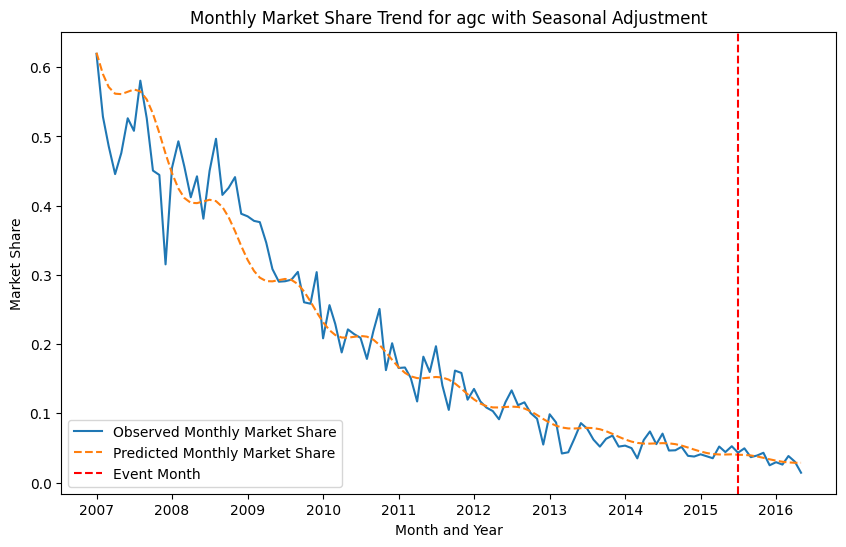

Results for attune:
                  Generalized Linear Model Regression Results                   
Dep. Variable:     monthly_market_share   No. Observations:                  102
Model:                              GLM   Df Residuals:                       97
Model Family:          NegativeBinomial   Df Model:                            4
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -30.709
Date:                  Mon, 12 Aug 2024   Deviance:                      0.80348
Time:                          14:45:11   Pearson chi2:                    0.846
No. Iterations:                       5   Pseudo R-squ. (CS):            0.06042
Covariance Type:              nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate
from datetime import timedelta

# Load data from the Excel file
file_path = 'LROI.xlsx'
df_a = pd.read_excel(file_path, 'LROI')
df_b = pd.read_excel(file_path, 'EVENT')
# Filter df_b to only include rows where 'to be used' is 1
df_b = df_b[df_b['to be used'] == 1]
# Convert date columns to datetime format
df_a['date'] = pd.to_datetime(df_a['date'], format='%d/%m/%Y')
df_b['date'] = pd.to_datetime(df_b['date'], format='%d/%m/%Y')

# Normalize the femur_name to lowercase for case-insensitive comparison
df_a['femur_name'] = df_a['femur_name'].str.lower()
df_b['femur_name'] = df_b['femur_name'].str.lower()

# Add a 'count' column to represent each occurrence as 1
df_a['count'] = 1

# Aggregate counts by month, year, and femur_name in Table A, then sort
df_a['month_year'] = df_a['date'].dt.to_period('M')

# Calculate monthly total counts of implants
df_monthly_total = df_a.groupby('month_year')['count'].sum().reset_index()
df_monthly_total.columns = ['month_year', 'total_count']

# Merge total counts back into df_a to calculate market share
df_a = df_a.merge(df_monthly_total, on='month_year')
df_a['market_share'] = df_a['count'] / df_a['total_count']

# Create different groupings based on the femur_name 'attune'
# Group by femur_name, month_year, and fixation for 'attune'
df_attune = df_a[df_a['femur_name'] == 'attune'].groupby(['femur_name', 'month_year', 'fixation']).agg(monthly_market_share=('market_share', 'sum')).reset_index()

# Group by femur_name and month_year for all other femur_names
df_others = df_a[df_a['femur_name'] != 'attune'].groupby(['femur_name', 'month_year']).agg(monthly_market_share=('market_share', 'sum')).reset_index()

# Concatenate both dataframes back together
df_a = pd.concat([df_attune, df_others], ignore_index=True)
df_a['month_year'] = df_a['month_year'].dt.to_timestamp()
df_a.sort_values(by=['femur_name', 'month_year'], inplace=True)

# To store Dickey-Fuller test results
df_results = []

# Processing for each event in df_b
for index, event in df_b[df_b['to be used'] == 1].iterrows():
    femur_name = event['femur_name']
    event_month_year = event['date'].to_period('M').to_timestamp()
    fixation = event.get('fixation', None)  # assuming this column exists in df_b

    # Adjust the filtering based on femur_name
    if femur_name == 'attune' and fixation:
        # Specifically for 'attune', include fixation in the filter if not null
        femur_data = df_a[(df_a['femur_name'].str.contains(femur_name, na=False)) & 
                          (df_a['fixation'] == fixation)]
    else:
        # General case for all other femur_names
        femur_data = df_a[df_a['femur_name'].str.contains(femur_name, na=False)]

    if femur_data.empty:
        print(f"No data available for {femur_name} after filtering.")
        continue

    # Create days_since_event and period columns
    femur_data['days_since_event'] = (femur_data['month_year'] - event_month_year).dt.days
    femur_data['period'] = np.where(femur_data['days_since_event'] < 0, 0, 1)
    femur_data['sin12'] = np.sin(2 * np.pi * femur_data['month_year'].dt.month / 12)
    femur_data['cos12'] = np.cos(2 * np.pi * femur_data['month_year'].dt.month / 12)

    # Dickey-Fuller test for stationarity
    result = adfuller(femur_data['monthly_market_share'])
    df_results.append({
        'Femur Name': femur_name,
        'ADF Statistic': result[0],
        'p-value': result[1],
        '1% Critical Value': result[4]['1%'],
        '5% Critical Value': result[4]['5%'],
        '10% Critical Value': result[4]['10%']
    })

    # Fit a Negative Binomial model with seasonal adjustments
    formula = 'monthly_market_share ~ days_since_event * period + sin12 + cos12'
    try:
        model = sm.GLM(femur_data['monthly_market_share'], sm.add_constant(femur_data[['days_since_event', 'period', 'sin12', 'cos12']]),
                       family=sm.families.NegativeBinomial()).fit()
        print(f"Results for {femur_name}:")
        print(model.summary())
        
        # Generate model predictions
        femur_data['predicted_market_share'] = model.predict(sm.add_constant(femur_data[['days_since_event', 'period', 'sin12', 'cos12']]))

    except Exception as e:
        print(f"An error occurred while fitting the model for {femur_name}: {e}")
        continue

    # Plotting results for the first event (change 'if femur_name=="agc"' to any other femur_name if needed)
    if femur_name == 'agc':
        plt.figure(figsize=(10, 6))
        plt.plot(femur_data['month_year'], femur_data['monthly_market_share'], label='Observed Monthly Market Share')
        plt.plot(femur_data['month_year'], femur_data['predicted_market_share'], label='Predicted Monthly Market Share', linestyle='--')
        plt.axvline(x=event_month_year, color='red', linestyle='--', label='Event Month')
        plt.title(f'Monthly Market Share Trend for {femur_name} with Seasonal Adjustment')
        plt.xlabel('Month and Year')
        plt.ylabel('Market Share')
        plt.legend()
        plt.show()

# Print the Dickey-Fuller test results in tabular format
print("Dickey-Fuller Test Results:")
print(tabulate(df_results, headers='keys', tablefmt='psql'))


In [ ]:
#######ITS without IMDRF code, old

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta

# Load data from the Excel file
file_path = 'LROI.xlsx'
df_a = pd.read_excel(file_path, 'LROI')
df_b = pd.read_excel(file_path, 'EVENT_IMDRF')

# Convert date columns to datetime format
df_a['date'] = pd.to_datetime(df_a['date'], format='%d/%m/%Y')
df_b['date'] = pd.to_datetime(df_b['date'], format='%d/%m/%Y')

# Normalize the femur_name to lowercase for case-insensitive comparison
df_a['femur_name'] = df_a['femur_name'].str.lower()
df_b['femur_name'] = df_b['femur_name'].str.lower()

# Add a 'count' column to represent each occurrence as 1
df_a['count'] = 1

# Aggregate counts by month, year, and femur_name in Table A, then sort
df_a['month_year'] = df_a['date'].dt.to_period('M')

# Calculate monthly total counts of implants
df_monthly_total = df_a.groupby('month_year')['count'].sum().reset_index()
df_monthly_total.columns = ['month_year', 'total_count']

# Merge total counts back into df_a to calculate market share
df_a = df_a.merge(df_monthly_total, on='month_year')
df_a['market_share'] = df_a['count'] / df_a['total_count']

# Create different groupings based on the femur_name 'attune'
# Group by femur_name, month_year, and fixation for 'attune'
df_attune = df_a[df_a['femur_name'] == 'attune'].groupby(['femur_name', 'month_year', 'fixation']).agg(monthly_market_share=('market_share', 'sum')).reset_index()

# Group by femur_name and month_year for all other femur_names
df_others = df_a[df_a['femur_name'] != 'attune'].groupby(['femur_name', 'month_year']).agg(monthly_market_share=('market_share', 'sum')).reset_index()

# Concatenate both dataframes back together
df_a = pd.concat([df_attune, df_others], ignore_index=True)
df_a['month_year'] = df_a['month_year'].dt.to_timestamp()
df_a.sort_values(by=['femur_name', 'month_year'], inplace=True)

# Initialize a DataFrame to store the summary results
summary_results = pd.DataFrame(columns=['IMDRFcode', 'Parameter', 'Coefficient', 'P_value', 'AIC'])

# Processing for each event in df_b
for index, event in df_b[(df_b['to be used'] == 1) & (df_b['femur_name'] != 'attune')].iterrows():
    femur_name = event['femur_name']
    imdrf_code = event['IMDRFcode']
    event_month_year = event['date'].to_period('M').to_timestamp()

    # Filter records in Table A for this femur_name
    femur_data = df_a[df_a['femur_name'].str.contains(femur_name, na=False)]

    if femur_data.empty:
        print(f"No data available for {femur_name} after filtering.")
        continue

    # Create days_since_event and period columns
    femur_data['days_since_event'] = (femur_data['month_year'] - event_month_year).dt.days
    femur_data['period'] = np.where(femur_data['days_since_event'] < 0, 0, 1)
    femur_data['sin365'] = np.sin(2 * np.pi * femur_data['month_year'].dt.month / 12)
    femur_data['cos365'] = np.cos(2 * np.pi * femur_data['month_year'].dt.month / 12)

    # Fit a Negative Binomial model with intercept, interaction term, time since event, and sinusoidal terms
    formula = 'monthly_market_share ~ days_since_event * period + sin365 + cos365'
    try:
        model = sm.GLM(femur_data['monthly_market_share'], sm.add_constant(femur_data[['days_since_event', 'period', 'sin365', 'cos365']]),
                       family=sm.families.NegativeBinomial()).fit()
        
        # Create a temporary DataFrame to store the summary for this model
        temp_df = pd.DataFrame({
            'IMDRFcode': [imdrf_code] * len(model.params),
            'Parameter': model.params.index,
            'Coefficient': model.params.values,
            'P_value': model.pvalues,
            'AIC': [model.aic] * len(model.params)
        })
        
        # Append the results to the main DataFrame
        summary_results = pd.concat([summary_results, temp_df], ignore_index=True)

        print(f"Results for {femur_name} with IMDRF code {imdrf_code}:")
        print(model.summary())
        
        # Generate model predictions
        femur_data['predicted_market_share'] = model.predict(sm.add_constant(femur_data[['days_since_event', 'period', 'sin365', 'cos365']]))

    except Exception as e:
        print(f"An error occurred while fitting the model for {femur_name} with IMDRF code {imdrf_code}: {e}")
        continue

    # Plotting results
#    plt.figure(figsize=(10, 6))
#    plt.plot(femur_data['month_year'], femur_data['monthly_market_share'], label='Observed Monthly Market Share')
#    plt.plot(femur_data['month_year'], femur_data['predicted_market_share'], label='Predicted Monthly Market Share', linestyle='--')
#    plt.axvline(x=event_month_year, color='red', linestyle='--', label='Event Month')
#    plt.title(f'Monthly Market Share Trend for {femur_name} with IMDRF Code {imdrf_code} and Seasonal Adjustment')
#    plt.xlabel('Month and Year')
#    plt.ylabel('Market Share')
#    plt.legend()
#    plt.show()

# Filter out only relevant parameters
summary_results_filtered = summary_results[summary_results['Parameter'].isin(['const', 'days_since_event'])]
# Aggregating results for an overall summary by IMDRF code and Parameter
summary_by_code = summary_results_filtered.groupby(['IMDRFcode', 'Parameter']).agg({
    'Coefficient': 'mean',
    'P_value': 'mean',
    'AIC': 'mean'
}).reset_index()

print(summary_by_code)


Results for agc with IMDRF code A02:
                  Generalized Linear Model Regression Results                   
Dep. Variable:     monthly_market_share   No. Observations:                  113
Model:                              GLM   Df Residuals:                      108
Model Family:          NegativeBinomial   Df Model:                            4
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -55.192
Date:                  Mon, 12 Aug 2024   Deviance:                      0.42299
Time:                          20:10:11   Pearson chi2:                    0.408
No. Iterations:                       5   Pseudo R-squ. (CS):             0.1007
Covariance Type:              nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [ ]:
######its normal 1 per model

Results for agc:
                  Generalized Linear Model Regression Results                   
Dep. Variable:     monthly_market_share   No. Observations:                  113
Model:                              GLM   Df Residuals:                      107
Model Family:          NegativeBinomial   Df Model:                            5
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -55.191
Date:                  Mon, 12 Aug 2024   Deviance:                      0.42013
Time:                          19:57:56   Pearson chi2:                    0.406
No. Iterations:                       5   Pseudo R-squ. (CS):             0.1007
Covariance Type:              nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

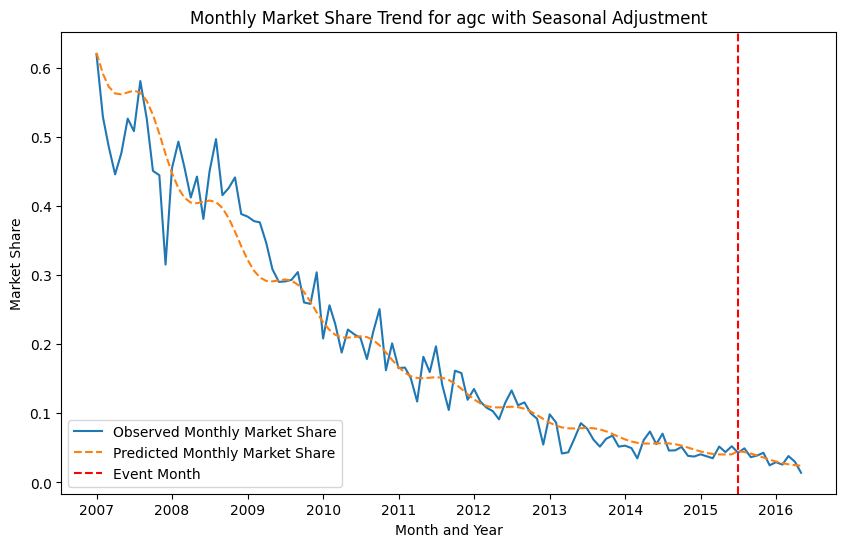

Results for attune:
                  Generalized Linear Model Regression Results                   
Dep. Variable:     monthly_market_share   No. Observations:                  102
Model:                              GLM   Df Residuals:                       96
Model Family:          NegativeBinomial   Df Model:                            5
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -30.708
Date:                  Mon, 12 Aug 2024   Deviance:                      0.80120
Time:                          19:57:56   Pearson chi2:                    0.840
No. Iterations:                       5   Pseudo R-squ. (CS):            0.06044
Covariance Type:              nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate
from datetime import timedelta

# Load data from the Excel file
file_path = 'LROI.xlsx'
df_a = pd.read_excel(file_path, 'LROI')
df_b = pd.read_excel(file_path, 'EVENT')
# Filter df_b to only include rows where 'to be used' is 1
df_b = df_b[df_b['to be used'] == 1]
# Convert date columns to datetime format
df_a['date'] = pd.to_datetime(df_a['date'], format='%d/%m/%Y')
df_b['date'] = pd.to_datetime(df_b['date'], format='%d/%m/%Y')

# Normalize the femur_name to lowercase for case-insensitive comparison
df_a['femur_name'] = df_a['femur_name'].str.lower()
df_b['femur_name'] = df_b['femur_name'].str.lower()

# Add a 'count' column to represent each occurrence as 1
df_a['count'] = 1

# Aggregate counts by month, year, and femur_name in Table A, then sort
df_a['month_year'] = df_a['date'].dt.to_period('M')

# Calculate monthly total counts of implants
df_monthly_total = df_a.groupby('month_year')['count'].sum().reset_index()
df_monthly_total.columns = ['month_year', 'total_count']

# Merge total counts back into df_a to calculate market share
df_a = df_a.merge(df_monthly_total, on='month_year')
df_a['market_share'] = df_a['count'] / df_a['total_count']

# Create different groupings based on the femur_name 'attune'
# Group by femur_name, month_year, and fixation for 'attune'
df_attune = df_a[df_a['femur_name'] == 'attune'].groupby(['femur_name', 'month_year', 'fixation']).agg(monthly_market_share=('market_share', 'sum')).reset_index()

# Group by femur_name and month_year for all other femur_names
df_others = df_a[df_a['femur_name'] != 'attune'].groupby(['femur_name', 'month_year']).agg(monthly_market_share=('market_share', 'sum')).reset_index()

# Concatenate both dataframes back together
df_a = pd.concat([df_attune, df_others], ignore_index=True)
df_a['month_year'] = df_a['month_year'].dt.to_timestamp()
df_a.sort_values(by=['femur_name', 'month_year'], inplace=True)

# To store Dickey-Fuller test results
df_results = []

# Processing for each event in df_b
for index, event in df_b[df_b['to be used'] == 1].iterrows():
    femur_name = event['femur_name']
    event_month_year = event['date'].to_period('M').to_timestamp()
    fixation = event.get('fixation', None)  # assuming this column exists in df_b

    # Adjust the filtering based on femur_name
    if femur_name == 'attune' and fixation:
        # Specifically for 'attune', include fixation in the filter if not null
        femur_data = df_a[(df_a['femur_name'].str.contains(femur_name, na=False)) & 
                          (df_a['fixation'] == fixation)]
    else:
        # General case for all other femur_names
        femur_data = df_a[df_a['femur_name'].str.contains(femur_name, na=False)]

    if femur_data.empty:
        print(f"No data available for {femur_name} after filtering.")
        continue

    # Create days_since_event and period columns
    femur_data['days_since_event'] = (femur_data['month_year'] - event_month_year).dt.days
    femur_data['period'] = np.where(femur_data['days_since_event'] < 0, 0, 1)
    femur_data['sin12'] = np.sin(2 * np.pi * femur_data['month_year'].dt.month / 12)
    femur_data['cos12'] = np.cos(2 * np.pi * femur_data['month_year'].dt.month / 12)

    # Dickey-Fuller test for stationarity
    result = adfuller(femur_data['monthly_market_share'])
    df_results.append({
        'Femur Name': femur_name,
        'ADF Statistic': result[0],
        'p-value': result[1],
        '1% Critical Value': result[4]['1%'],
        '5% Critical Value': result[4]['5%'],
        '10% Critical Value': result[4]['10%']
    })

    # Fit a Negative Binomial model with seasonal adjustments
    formula = 'monthly_market_share ~ days_since_event + period + days_since_event:period + sin12 + cos12'
    try:
        model = sm.GLM.from_formula(formula, data=femur_data, family=sm.families.NegativeBinomial()).fit()
        print(f"Results for {femur_name}:")
        print(model.summary())
        
        # Generate model predictions
        femur_data['predicted_market_share'] = model.predict(femur_data)

    except Exception as e:
        print(f"An error occurred while fitting the model for {femur_name}: {e}")
        continue

    # Plotting results for the first event (change 'if femur_name=="agc"' to any other femur_name if needed)
    if femur_name == 'agc':
        plt.figure(figsize=(10, 6))
        plt.plot(femur_data['month_year'], femur_data['monthly_market_share'], label='Observed Monthly Market Share')
        plt.plot(femur_data['month_year'], femur_data['predicted_market_share'], label='Predicted Monthly Market Share', linestyle='--')
        plt.axvline(x=event_month_year, color='red', linestyle='--', label='Event Month')
        plt.title(f'Monthly Market Share Trend for {femur_name} with Seasonal Adjustment')
        plt.xlabel('Month and Year')
        plt.ylabel('Market Share')
        plt.legend()
        plt.show()

# Print the Dickey-Fuller test results in tabular format
print("Dickey-Fuller Test Results:")
print(tabulate(df_results, headers='keys', tablefmt='psql'))


In [ ]:
###ITS by IMDRF code

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta

# Load data from the Excel file
file_path = 'LROI.xlsx'
df_a = pd.read_excel(file_path, 'LROI')
df_b = pd.read_excel(file_path, 'EVENT_IMDRF')

# Convert date columns to datetime format
df_a['date'] = pd.to_datetime(df_a['date'], format='%d/%m/%Y')
df_b['date'] = pd.to_datetime(df_b['date'], format='%d/%m/%Y')

# Normalize the femur_name to lowercase for case-insensitive comparison
df_a['femur_name'] = df_a['femur_name'].str.lower()
df_b['femur_name'] = df_b['femur_name'].str.lower()

# Add a 'count' column to represent each occurrence as 1
df_a['count'] = 1

# Aggregate counts by month, year, and femur_name in Table A, then sort
df_a['month_year'] = df_a['date'].dt.to_period('M')

# Calculate monthly total counts of implants
df_monthly_total = df_a.groupby('month_year')['count'].sum().reset_index()
df_monthly_total.columns = ['month_year', 'total_count']

# Merge total counts back into df_a to calculate market share
df_a = df_a.merge(df_monthly_total, on='month_year')
df_a['market_share'] = df_a['count'] / df_a['total_count']

# Create different groupings based on the femur_name 'attune'
# Group by femur_name, month_year, and fixation for 'attune'
df_attune = df_a[df_a['femur_name'] == 'attune'].groupby(['femur_name', 'month_year', 'fixation']).agg(monthly_market_share=('market_share', 'sum')).reset_index()

# Group by femur_name and month_year for all other femur_names
df_others = df_a[df_a['femur_name'] != 'attune'].groupby(['femur_name', 'month_year']).agg(monthly_market_share=('market_share', 'sum')).reset_index()

# Concatenate both dataframes back together
df_a = pd.concat([df_attune, df_others], ignore_index=True)
df_a['month_year'] = df_a['month_year'].dt.to_timestamp()
df_a.sort_values(by=['femur_name', 'month_year'], inplace=True)

# Initialize a DataFrame to store the summary results
summary_results = pd.DataFrame(columns=['IMDRFcode', 'Intercept', 'Intercept_P_value', 
                                        'days_since_event', 'days_since_event_P_value',
                                        'period', 'period_P_value',
                                        'days_since_event:period', 'days_since_event:period_P_value',
                                        'sin12', 'sin12_P_value', 
                                        'cos12', 'cos12_P_value', 'AIC'])

# Processing for each event in df_b
for index, event in df_b[(df_b['to be used'] == 1) & (df_b['femur_name'] != 'attune')].iterrows():
    femur_name = event['femur_name']
    imdrf_code = event['IMDRFcode']
    event_month_year = event['date'].to_period('M').to_timestamp()

    # Filter records in Table A for this femur_name
    femur_data = df_a[df_a['femur_name'].str.contains(femur_name, na=False)]

    if femur_data.empty:
        print(f"No data available for {femur_name} after filtering.")
        continue

    # Create days_since_event and period columns
    femur_data['days_since_event'] = (femur_data['month_year'] - event_month_year).dt.days
    femur_data['period'] = np.where(femur_data['days_since_event'] < 0, 0, 1)
    femur_data['sin12'] = np.sin(2 * np.pi * femur_data['month_year'].dt.month / 12)
    femur_data['cos12'] = np.cos(2 * np.pi * femur_data['month_year'].dt.month / 12)

    # Fit a Negative Binomial model with intercept, interaction term, time since event, and sinusoidal terms
    formula = 'monthly_market_share ~ days_since_event * period + sin12 + cos12'
    try:
        model = sm.GLM.from_formula(formula, data=femur_data, family=sm.families.NegativeBinomial()).fit()
        
        # Store the summary results in the DataFrame
        summary_results = summary_results.append({
            'IMDRFcode': imdrf_code,
            'Intercept': model.params['Intercept'],
            'Intercept_P_value': model.pvalues['Intercept'],
            'days_since_event': model.params['days_since_event'],
            'days_since_event_P_value': model.pvalues['days_since_event'],
            'period': model.params['period'],
            'period_P_value': model.pvalues['period'],
            'days_since_event:period': model.params['days_since_event:period'],
            'days_since_event:period_P_value': model.pvalues['days_since_event:period'],
            'sin12': model.params['sin12'],
            'sin12_P_value': model.pvalues['sin12'],
            'cos12': model.params['cos12'],
            'cos12_P_value': model.pvalues['cos12'],
            'AIC': model.aic
        }, ignore_index=True)

        print(f"Results for {femur_name} with IMDRF code {imdrf_code}:")
        print(model.summary())
        
        # Generate model predictions
        femur_data['predicted_market_share'] = model.predict(sm.add_constant(femur_data[['days_since_event', 'period', 'sin12', 'cos12']]))

    except Exception as e:
        print(f"An error occurred while fitting the model for {femur_name} with IMDRF code {imdrf_code}: {e}")
        continue

# Print the summary results in a tabular format
print(tabulate(summary_results, headers='keys', tablefmt='psql'))


Results for agc with IMDRF code A02:
                  Generalized Linear Model Regression Results                   
Dep. Variable:     monthly_market_share   No. Observations:                  113
Model:                              GLM   Df Residuals:                      107
Model Family:          NegativeBinomial   Df Model:                            5
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -55.191
Date:                  Mon, 12 Aug 2024   Deviance:                      0.42013
Time:                          20:19:11   Pearson chi2:                    0.406
No. Iterations:                       5   Pseudo R-squ. (CS):             0.1007
Covariance Type:              nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------